In [618]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression,RidgeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler,StandardScaler


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Problem Statement:

## Data Gathering

In [619]:
df = pd.read_csv("heart.csv")
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

<AxesSubplot:xlabel='target', ylabel='count'>

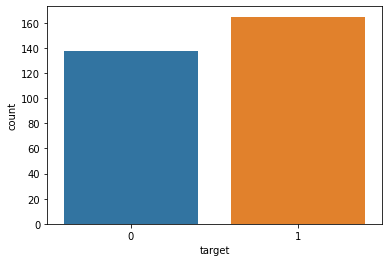

In [871]:
sns.countplot(df,x =df["target"])

## EDA

In [620]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [621]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

<AxesSubplot:>

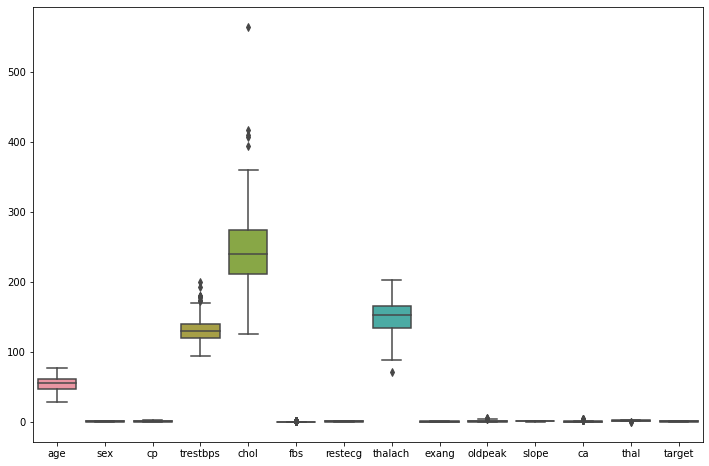

In [622]:
plt.figure(figsize=(12,8))
sns.boxplot(df)

## Feature Engineering

### 1.age

<AxesSubplot:xlabel='age', ylabel='Density'>

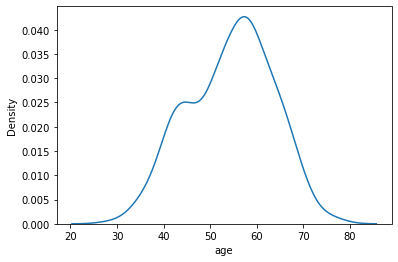

In [623]:
sns.kdeplot(df["age"])

In [624]:
df["age"].skew()

-0.2024633654856539

<AxesSubplot:xlabel='age'>

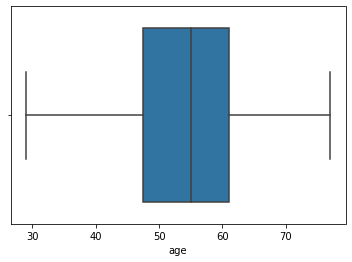

In [625]:
sns.boxplot(x = df["age"])

In [626]:
q1 = df["age"].quantile(0.25)
q3 = df["age"].quantile(0.75)

iqr = q3-q1

lower_tail = q1 - (1.5*iqr)
print("lower_tail : ",lower_tail)

upper_tail = q3 + (1.5*iqr)
print("upper_tail : ",upper_tail)

lower_tail_outliers = np.where(df["age"] < lower_tail)
print("lower_tail_outliers : ",lower_tail_outliers)

upper_tail_outliers = np.where(df["age"] > upper_tail)
print("upper_tail_outliers : ",upper_tail_outliers)

lower_tail_outliers_count = len(lower_tail_outliers[0])
print("lower_tail_outliers_count : ",lower_tail_outliers_count)

upper_tail_outliers_count = len(upper_tail_outliers[0])
print("upper_tail_outliers_count : ",upper_tail_outliers_count)

lower_tail :  27.25
upper_tail :  81.25
lower_tail_outliers :  (array([], dtype=int64),)
upper_tail_outliers :  (array([], dtype=int64),)
lower_tail_outliers_count :  0
upper_tail_outliers_count :  0


### 2.sex

In [627]:
# sex is a catelorical variable , so no need to check for Normal distribution & Outliers

### 3.cp

In [628]:
# cp is a catelorical variable , so no need to check for Normal distribution & Outliers

### 4.trestbps

<AxesSubplot:xlabel='trestbps'>

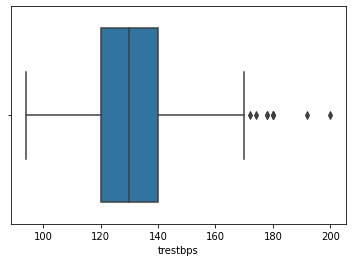

In [629]:
sns.boxplot(x = df["trestbps"])

<AxesSubplot:xlabel='trestbps', ylabel='Density'>

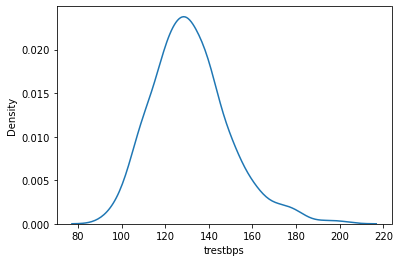

In [630]:
sns.kdeplot(df["trestbps"])

In [631]:
df["trestbps"].skew()  # the data is positively skewed

0.7137684379181465

In [632]:
q1 = df["trestbps"].quantile(0.25)
q3 = df["trestbps"].quantile(0.75)

iqr = q3-q1

lower_tail = q1 - (1.5*iqr)
print("lower_tail : ",lower_tail)

upper_tail = q3 + (1.5*iqr)
print("upper_tail : ",upper_tail)

lower_tail_outliers = np.where(df["trestbps"] < lower_tail)
print("lower_tail_outliers : ",lower_tail_outliers)

upper_tail_outliers = np.where(df["trestbps"] > upper_tail)
print("upper_tail_outliers : ",upper_tail_outliers)

lower_tail_outliers_count = len(lower_tail_outliers[0])
print("lower_tail_outliers_count : ",lower_tail_outliers_count)

upper_tail_outliers_count = len(upper_tail_outliers[0])
print("upper_tail_outliers_count : ",upper_tail_outliers_count)

df["trestbps"] = np.where(df["trestbps"]>upper_tail,upper_tail,df["trestbps"])

lower_tail :  90.0
upper_tail :  170.0
lower_tail_outliers :  (array([], dtype=int64),)
upper_tail_outliers :  (array([  8, 101, 110, 203, 223, 241, 248, 260, 266], dtype=int64),)
lower_tail_outliers_count :  0
upper_tail_outliers_count :  9


<AxesSubplot:xlabel='trestbps', ylabel='Density'>

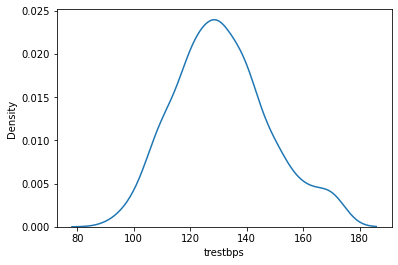

In [633]:
sns.kdeplot(df["trestbps"])

In [634]:
df["trestbps"].skew()

0.3863665065041358

<AxesSubplot:xlabel='trestbps'>

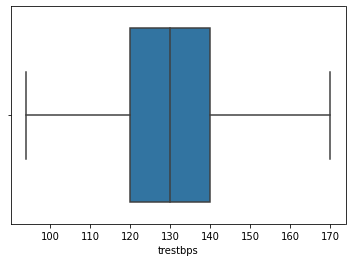

In [635]:
sns.boxplot(x = df["trestbps"])

### 5.chol

<AxesSubplot:xlabel='chol'>

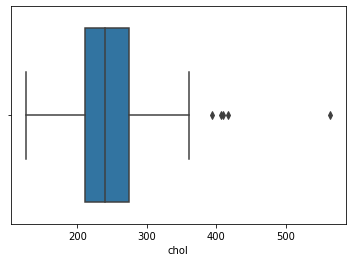

In [636]:
sns.boxplot(x = df["chol"])

In [637]:
df["chol"].skew()

1.1434008206693387

<AxesSubplot:xlabel='chol', ylabel='Density'>

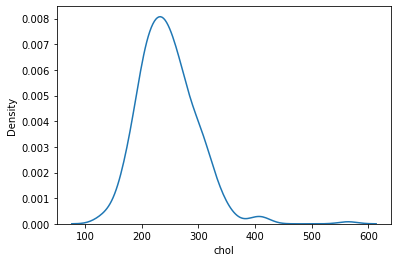

In [638]:
sns.kdeplot(df["chol"])

In [639]:
q1 = df["chol"].quantile(0.25)
q3 = df["chol"].quantile(0.75)

iqr = q3-q1

lower_tail = q1 - (1.5*iqr)
print("lower_tail : ",lower_tail)

upper_tail = q3 + (1.5*iqr)
print("upper_tail : ",upper_tail)

lower_tail_outliers = np.where(df["chol"] < lower_tail)
print("lower_tail_outliers : ",lower_tail_outliers)

upper_tail_outliers = np.where(df["chol"] > upper_tail)
print("upper_tail_outliers : ",upper_tail_outliers)

lower_tail_outliers_count = len(lower_tail_outliers[0])
print("lower_tail_outliers_count : ",lower_tail_outliers_count)

upper_tail_outliers_count = len(upper_tail_outliers[0])
print("upper_tail_outliers_count : ",upper_tail_outliers_count)

df["chol"] = np.where(df["chol"]>upper_tail,upper_tail,df["chol"])

lower_tail :  115.75
upper_tail :  369.75
lower_tail_outliers :  (array([], dtype=int64),)
upper_tail_outliers :  (array([ 28,  85,  96, 220, 246], dtype=int64),)
lower_tail_outliers_count :  0
upper_tail_outliers_count :  5


<AxesSubplot:xlabel='chol'>

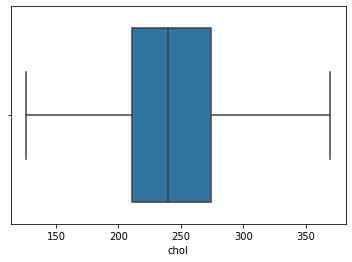

In [640]:
sns.boxplot(x = df["chol"])

In [641]:
df["chol"].skew()

0.3332671878477172

<AxesSubplot:xlabel='chol', ylabel='Density'>

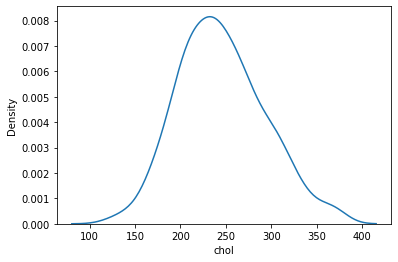

In [642]:
sns.kdeplot(df["chol"])

### 6.fbs

In [643]:
# fbs is a catelorical variable , so no need to check for Normal distribution & Outliers

### 7.restecg

In [644]:
# restecg is a catelorical variable , so no need to check for Normal distribution & Outliers

### 8.thalach

<AxesSubplot:xlabel='thalach'>

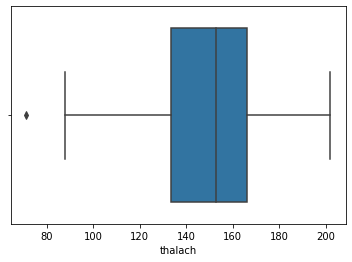

In [645]:
sns.boxplot(x = df["thalach"])

<AxesSubplot:xlabel='thalach', ylabel='Density'>

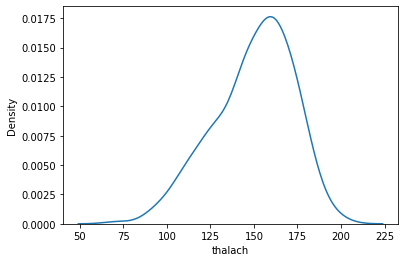

In [646]:
sns.kdeplot(df["thalach"])

In [647]:
df["thalach"].skew() # the data is slightly newgatively skewed

-0.5374096526832253

In [648]:
q1 = df["thalach"].quantile(0.25)
q3 = df["thalach"].quantile(0.75)

iqr = q3-q1

lower_tail = q1 - (1.5*iqr)
print("lower_tail : ",lower_tail)

upper_tail = q3 + (1.5*iqr)
print("upper_tail : ",upper_tail)

lower_tail_outliers = np.where(df["thalach"] < lower_tail)
print("lower_tail_outliers : ",lower_tail_outliers)

upper_tail_outliers = np.where(df["thalach"] > upper_tail)
print("upper_tail_outliers : ",upper_tail_outliers)

lower_tail_outliers_count = len(lower_tail_outliers[0])
print("lower_tail_outliers_count : ",lower_tail_outliers_count)

upper_tail_outliers_count = len(upper_tail_outliers[0])
print("upper_tail_outliers_count : ",upper_tail_outliers_count)

df["thalach"] = np.where(df["thalach"]<lower_tail,lower_tail,df["thalach"])

lower_tail :  84.75
upper_tail :  214.75
lower_tail_outliers :  (array([272], dtype=int64),)
upper_tail_outliers :  (array([], dtype=int64),)
lower_tail_outliers_count :  1
upper_tail_outliers_count :  0


<AxesSubplot:xlabel='thalach'>

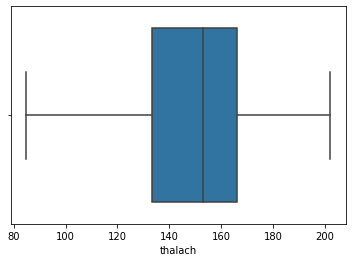

In [649]:
sns.boxplot(x = df["thalach"])

In [650]:
df["thalach"].skew() 

-0.49339248006816744

<AxesSubplot:xlabel='thalach', ylabel='Density'>

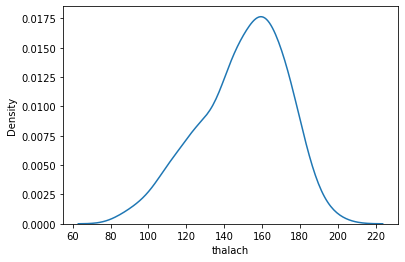

In [651]:
sns.kdeplot(df["thalach"])

### 9.exang

In [652]:
# exang is a catelorical variable , so no need to check for Normal distribution & Outliers

### 10.oldpeak

<AxesSubplot:xlabel='oldpeak'>

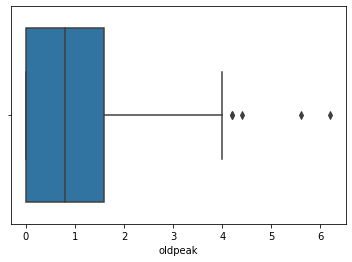

In [653]:
sns.boxplot(x = df["oldpeak"])

In [654]:
df["oldpeak"].skew()

1.269719930601997

<AxesSubplot:xlabel='oldpeak', ylabel='Density'>

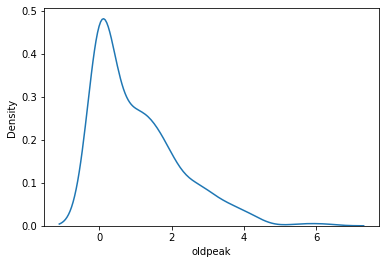

In [655]:
sns.kdeplot(df["oldpeak"])

In [656]:
q1 = df["oldpeak"].quantile(0.25)
q3 = df["oldpeak"].quantile(0.75)

iqr = q3-q1

lower_tail = q1 - (1.5*iqr)
print("lower_tail : ",lower_tail)

upper_tail = q3 + (1.5*iqr)
print("upper_tail : ",upper_tail)

lower_tail_outliers = np.where(df["oldpeak"] < lower_tail)
print("lower_tail_outliers : ",lower_tail_outliers)

upper_tail_outliers = np.where(df["oldpeak"] > upper_tail)
print("upper_tail_outliers : ",upper_tail_outliers)

lower_tail_outliers_count = len(lower_tail_outliers[0])
print("lower_tail_outliers_count : ",lower_tail_outliers_count)

upper_tail_outliers_count = len(upper_tail_outliers[0])
print("upper_tail_outliers_count : ",upper_tail_outliers_count)

df["oldpeak"] = np.where(df["oldpeak"]>upper_tail,upper_tail,df["oldpeak"])

lower_tail :  -2.4000000000000004
upper_tail :  4.0
lower_tail_outliers :  (array([], dtype=int64),)
upper_tail_outliers :  (array([101, 204, 221, 250, 291], dtype=int64),)
lower_tail_outliers_count :  0
upper_tail_outliers_count :  5


<AxesSubplot:xlabel='oldpeak', ylabel='Density'>

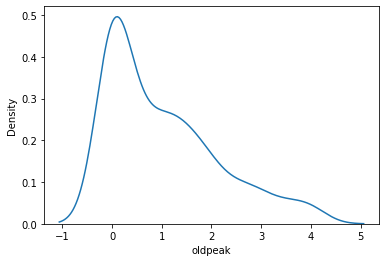

In [657]:
sns.kdeplot(df["oldpeak"])

<AxesSubplot:xlabel='oldpeak'>

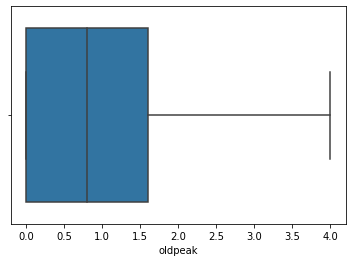

In [658]:
sns.boxplot(x = df["oldpeak"])

In [659]:
df["oldpeak"].skew()

0.9978850875188225

### 11.slope

In [660]:
# slope is a catelorical variable , so no need to check for Normal distribution & Outliers

### 12.ca

In [661]:
# ca is a catelorical variable , so no need to check for Normal distribution & Outliers

### 13.thal

In [662]:
# thal is a catelorical variable , so no need to check for Normal distribution & Outliers

### 14.target

In [663]:
# target is a catelorical variable , so no need to check for Normal distribution & Outliers

### New Cleaned df

In [664]:
df

age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3     145.0  233.0    1        0    150.0      0      2.3   
1     37    1   2     130.0  250.0    0        1    187.0      0      3.5   
2     41    0   1     130.0  204.0    0        0    172.0      0      1.4   
3     56    1   1     120.0  236.0    0        1    178.0      0      0.8   
4     57    0   0     120.0  354.0    0        1    163.0      1      0.6   
..   ...  ...  ..       ...    ...  ...      ...      ...    ...      ...   
298   57    0   0     140.0  241.0    0        1    123.0      1      0.2   
299   45    1   3     110.0  264.0    0        1    132.0      0      1.2   
300   68    1   0     144.0  193.0    1        1    141.0      0      3.4   
301   57    1   0     130.0  131.0    0        1    115.0      1      1.2   
302   57    0   1     130.0  236.0    0        0    174.0      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [855]:
df.loc[293]

age          67.0
sex           1.0
cp            2.0
trestbps    152.0
chol        212.0
fbs           0.0
restecg       0.0
thalach     150.0
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          3.0
target        0.0
Name: 293, dtype: float64

In [856]:
df.loc[43]

age          53.0
sex           0.0
cp            0.0
trestbps    130.0
chol        264.0
fbs           0.0
restecg       0.0
thalach     143.0
exang         0.0
oldpeak       0.4
slope         1.0
ca            0.0
thal          2.0
target        1.0
Name: 43, dtype: float64

<AxesSubplot:>

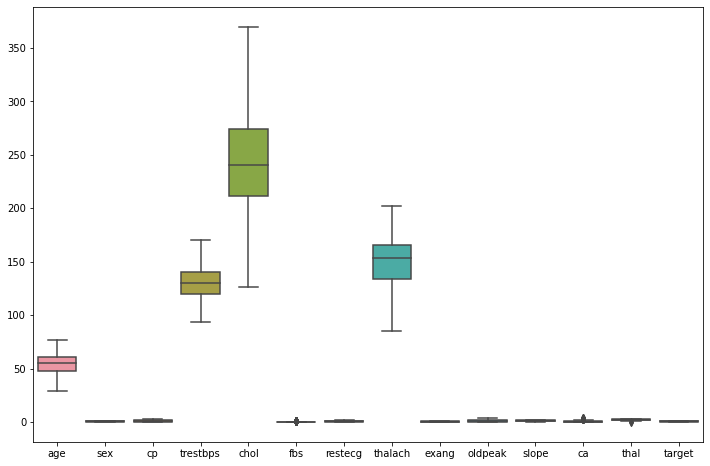

In [665]:
plt.figure(figsize=(12,8))
sns.boxplot(df)

# 1.Logistic Regression

### 1.1.Logistic regression

### Train-Test Split

In [666]:
x = df.drop("target",axis = 1)
y = df["target"]

In [667]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=47,stratify=y)

In [668]:
x_train

age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
293   67    1   2     152.0  212.0    0        0    150.0      0      0.8   
266   55    0   0     170.0  327.0    0        2    117.0      1      3.4   
43    53    0   0     130.0  264.0    0        0    143.0      0      0.4   
169   53    1   0     140.0  203.0    1        0    155.0      1      3.1   
166   67    1   0     120.0  229.0    0        0    129.0      1      2.6   
..   ...  ...  ..       ...    ...  ...      ...      ...    ...      ...   
80    41    1   2     112.0  250.0    0        1    179.0      0      0.0   
290   61    1   0     148.0  203.0    0        1    161.0      0      0.0   
176   60    1   0     117.0  230.0    1        1    160.0      1      1.4   
14    58    0   3     150.0  283.0    1        0    162.0      0      1.0   
193   60    1   0     145.0  282.0    0        0    142.0      1      2.8   

     slope  ca  thal  
293      1   0     3  
266      1   0     2  
43       1   0     2  
169      0   0     3  
166      1   2     3  
..     ...  ..   ...  
80       2   0     2  
290      2   1     3  
176      2   2     3  
14       2   0     2  
193      1   2     3  

[242 rows x 13 columns]

In [669]:
x_test

age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
123   54    0   2     108.0  267.0    0        0    167.0      0      0.0   
236   58    1   0     125.0  300.0    0        0    171.0      0      0.0   
44    39    1   2     140.0  321.0    0        0    182.0      0      0.0   
144   76    0   2     140.0  197.0    0        2    116.0      0      1.1   
299   45    1   3     110.0  264.0    0        1    132.0      0      1.2   
..   ...  ...  ..       ...    ...  ...      ...      ...    ...      ...   
245   48    1   0     124.0  274.0    0        0    166.0      0      0.5   
237   60    1   0     140.0  293.0    0        0    170.0      0      1.2   
52    62    1   2     130.0  231.0    0        1    146.0      0      1.8   
91    57    1   0     132.0  207.0    0        1    168.0      1      0.0   
153   66    0   2     146.0  278.0    0        0    152.0      0      0.0   

     slope  ca  thal  
123      2   0     2  
236      2   2     3  
44       2   0     2  
144      1   0     2  
299      1   0     3  
..     ...  ..   ...  
245      1   0     3  
237      1   2     3  
52       1   3     3  
91       2   0     3  
153      1   1     2  

[61 rows x 13 columns]

### Instantiation of logistic model

In [670]:
logistic_reg = LogisticRegression()
logistic_reg.fit(x_train,y_train)

LogisticRegression()

### Training Data Evaluation

In [671]:
y_pred_train = logistic_reg.predict(x_train)

In [672]:
y_pred_train[0:15]

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [673]:
y_train[0:15].to_numpy()

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [674]:
logistic_train_acc = logistic_reg.score(x_train,y_train)
logistic_train_acc

0.8471074380165289

In [675]:
acc_score = accuracy_score(y_train,y_pred_train)
print("Accuracy_Score :\n",acc_score)

cnf_metrix = confusion_matrix(y_train,y_pred_train)
print("Confusion_Metrix : \n",cnf_metrix)

clf_report = classification_report(y_train,y_pred_train)
print("Classification_Report : \n",clf_report)

Accuracy_Score :
 0.8471074380165289
Confusion_Metrix : 
 [[ 86  24]
 [ 13 119]]
Classification_Report : 
               precision    recall  f1-score   support

           0       0.87      0.78      0.82       110
           1       0.83      0.90      0.87       132

    accuracy                           0.85       242
   macro avg       0.85      0.84      0.84       242
weighted avg       0.85      0.85      0.85       242



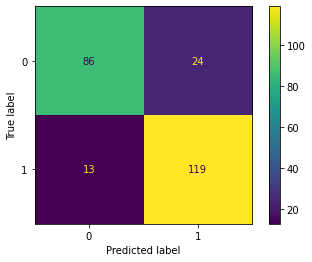

In [676]:
plot_confusion_matrix(logistic_reg,x_train,y_train)

### Testing Data Evaluation

In [677]:
y_pred_test = logistic_reg.predict(x_test)

In [678]:
logistic_test_acc = logistic_reg.score(x_test,y_test)
logistic_test_acc

0.8360655737704918

In [679]:
acc_score = accuracy_score(y_test,y_pred_test)
print("Accuracy_Score :\n",acc_score)

cnf_metrix = confusion_matrix(y_test,y_pred_test)
print("Confusion_Metrix : \n",cnf_metrix)

clf_report = classification_report(y_test,y_pred_test)
print("Classification_Report : \n",clf_report)

Accuracy_Score :
 0.8360655737704918
Confusion_Metrix : 
 [[20  8]
 [ 2 31]]
Classification_Report : 
               precision    recall  f1-score   support

           0       0.91      0.71      0.80        28
           1       0.79      0.94      0.86        33

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61



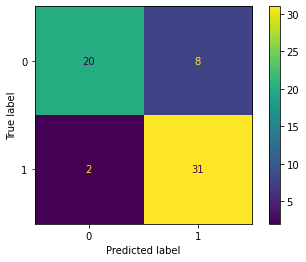

In [680]:
plot_confusion_matrix(logistic_reg,x_test,y_test)

### 1.2.Ridge regression

### Instantiating ridge regression

In [681]:
ridge_reg = RidgeClassifier(alpha=0.01)
ridge_reg.fit(x_train,y_train)

RidgeClassifier(alpha=0.01)

### Training Data Evaluation for Ridge regresion

In [682]:
y_pred_train = ridge_reg.predict(x_train)

In [683]:
y_pred_train[0:15]

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [684]:
y_train[0:15].to_numpy()

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [685]:
ridge_train_acc = ridge_reg.score(x_train,y_train)
ridge_train_acc

0.8471074380165289

In [686]:
acc_score = accuracy_score(y_train,y_pred_train)
print("Accuracy_Score :\n",acc_score)

cnf_metrix = confusion_matrix(y_train,y_pred_train)
print("Confusion_Metrix : \n",cnf_metrix)

clf_report = classification_report(y_train,y_pred_train)
print("Classification_Report : \n",clf_report)

Accuracy_Score :
 0.8471074380165289
Confusion_Metrix : 
 [[ 85  25]
 [ 12 120]]
Classification_Report : 
               precision    recall  f1-score   support

           0       0.88      0.77      0.82       110
           1       0.83      0.91      0.87       132

    accuracy                           0.85       242
   macro avg       0.85      0.84      0.84       242
weighted avg       0.85      0.85      0.85       242



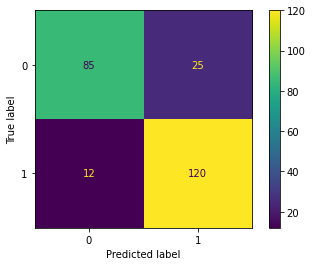

In [687]:
plot_confusion_matrix(ridge_reg,x_train,y_train)

### Testing Data Evaluation

In [688]:
y_pred_test = ridge_reg.predict(x_test)

In [689]:
ridge_test_acc = ridge_reg.score(x_test,y_test)
ridge_test_acc

0.8032786885245902

In [690]:
acc_score = accuracy_score(y_test,y_pred_test)
print("Accuracy_Score :\n",acc_score)

cnf_metrix = confusion_matrix(y_test,y_pred_test)
print("Confusion_Metrix : \n",cnf_metrix)

clf_report = classification_report(y_test,y_pred_test)
print("Classification_Report : \n",clf_report)

Accuracy_Score :
 0.8032786885245902
Confusion_Metrix : 
 [[18 10]
 [ 2 31]]
Classification_Report : 
               precision    recall  f1-score   support

           0       0.90      0.64      0.75        28
           1       0.76      0.94      0.84        33

    accuracy                           0.80        61
   macro avg       0.83      0.79      0.79        61
weighted avg       0.82      0.80      0.80        61



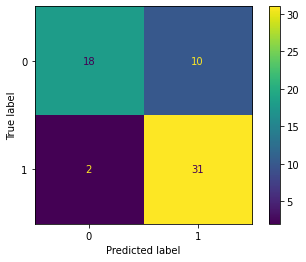

In [691]:
plot_confusion_matrix(ridge_reg,x_test,y_test)

In [692]:
log_acc = {"logistic_train_acc":logistic_train_acc,"logistic_test_acc":logistic_test_acc,"ridge_train_acc":ridge_train_acc
          ,"ridge_test_acc":ridge_test_acc}
print(log_acc)
logistic_acc_df = pd.DataFrame([log_acc])
logistic_acc_df.T

{'logistic_train_acc': 0.8471074380165289, 'logistic_test_acc': 0.8360655737704918, 'ridge_train_acc': 0.8471074380165289, 'ridge_test_acc': 0.8032786885245902}


0
logistic_train_acc  0.847107
logistic_test_acc   0.836066
ridge_train_acc     0.847107
ridge_test_acc      0.803279

# 2.knn Model

### instantiating knn model

In [693]:
knn_model1 = KNeighborsClassifier()
knn_model1.fit(x_train,y_train)

KNeighborsClassifier()

### Training Data Evaluation

In [694]:
y_pred_train = knn_model1.predict(x_train)

In [695]:
y_pred_train[0:15]

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [696]:
y_train[0:15].to_numpy()

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [697]:
knn_train_acc = knn_model1.score(x_train,y_train)
knn_train_acc

0.7603305785123967

In [698]:
acc_score = accuracy_score(y_train,y_pred_train)
print("Accuracy_Score :\n",acc_score)

cnf_metrix = confusion_matrix(y_train,y_pred_train)
print("Confusion_Metrix : \n",cnf_metrix)

clf_report = classification_report(y_train,y_pred_train)
print("Classification_Report : \n",clf_report)

Accuracy_Score :
 0.7603305785123967
Confusion_Metrix : 
 [[ 77  33]
 [ 25 107]]
Classification_Report : 
               precision    recall  f1-score   support

           0       0.75      0.70      0.73       110
           1       0.76      0.81      0.79       132

    accuracy                           0.76       242
   macro avg       0.76      0.76      0.76       242
weighted avg       0.76      0.76      0.76       242



In [699]:
plot_confusion_matrix(knn_model1,x_train,y_train)

### Testing Data Evaluation

In [700]:
y_pred_test = knn_model1.predict(x_test)

In [701]:
y_pred_test[0:15]

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [702]:
y_test[0:15].to_numpy()

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [703]:
knn_test_acc = knn_model1.score(x_test,y_test)
knn_test_acc

0.6065573770491803

In [704]:
acc_score = accuracy_score(y_test,y_pred_test)
print("Accuracy_Score :\n",acc_score)

cnf_metrix = confusion_matrix(y_test,y_pred_test)
print("Confusion_Metrix : \n",cnf_metrix)

clf_report = classification_report(y_test,y_pred_test)
print("Classification_Report : \n",clf_report)

Accuracy_Score :
 0.6065573770491803
Confusion_Metrix : 
 [[ 9 19]
 [ 5 28]]
Classification_Report : 
               precision    recall  f1-score   support

           0       0.64      0.32      0.43        28
           1       0.60      0.85      0.70        33

    accuracy                           0.61        61
   macro avg       0.62      0.58      0.56        61
weighted avg       0.62      0.61      0.58        61



In [705]:
plot_confusion_matrix(knn_model1,x_test,y_test)

### Hyperparameter Tuning

### Finding Best k or n_neighbors value as p = 1

In [706]:
train_acc = []
test_acc  = []
k_values = []
for k in range(3,25):
    knn_model2 = KNeighborsClassifier(n_neighbors=k,p=1)
    knn_model2.fit(x_train,y_train)
    k_values.append(k)
    
    training_acc = knn_model2.score(x_train,y_train)
    train_acc.append(training_acc)
    
    testing_acc  = knn_model2.score(x_test,y_test)
    test_acc.append(testing_acc)
    
print("train_acc :",train_acc)
print("test_acc :",test_acc)
print("k_values :",k_values)

train_acc : [0.8223140495867769, 0.8057851239669421, 0.7933884297520661, 0.7727272727272727, 0.7933884297520661, 0.7727272727272727, 0.7768595041322314, 0.7603305785123967, 0.756198347107438, 0.743801652892562, 0.7479338842975206, 0.7355371900826446, 0.731404958677686, 0.731404958677686, 0.7355371900826446, 0.743801652892562, 0.7396694214876033, 0.743801652892562, 0.7479338842975206, 0.7396694214876033, 0.7272727272727273, 0.7272727272727273]
test_acc : [0.6557377049180327, 0.6885245901639344, 0.639344262295082, 0.6557377049180327, 0.6557377049180327, 0.6229508196721312, 0.6229508196721312, 0.6065573770491803, 0.639344262295082, 0.6557377049180327, 0.6229508196721312, 0.6721311475409836, 0.6557377049180327, 0.6557377049180327, 0.639344262295082, 0.6557377049180327, 0.639344262295082, 0.639344262295082, 0.639344262295082, 0.6557377049180327, 0.639344262295082, 0.6229508196721312]
k_values : [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [707]:
plt.plot(train_acc)
plt.plot(test_acc)

In [708]:
acc_diff = np.array(train_acc)-np.array(test_acc)
index = np.where(acc_diff == min(acc_diff))[0]
best_k_value = k_values[index[0]]
print("Best_K_value as p=1 :",best_k_value)

Best_K_value as p=1 : 14


### Training_Accuracy & Testing_Accuracy as k=14 & p=1

In [709]:
knn_train_acc_H1 = train_acc[index[0]]
print("Training Acc for k=14 & p=1 :",knn_train_acc_H1)

knn_test_acc_H1 = test_acc[index[0]]
print("Testing Acc for k=14 & p=1 :",knn_test_acc_H1)

Training Acc for k=14 & p=1 : 0.7355371900826446
Testing Acc for k=14 & p=1 : 0.6721311475409836


### Finding Best k or n_neighbors value as p = 2

In [710]:
train_acc = []
test_acc  = []
k_values = []
for k in range(3,25):
    knn_model3 = KNeighborsClassifier(n_neighbors=k,p=2)
    knn_model3.fit(x_train,y_train)
    k_values.append(k)
    
    training_acc = knn_model3.score(x_train,y_train)
    train_acc.append(training_acc)
    
    testing_acc  = knn_model3.score(x_test,y_test)
    test_acc.append(testing_acc)
    
print("train_acc :",train_acc)
print("test_acc :",test_acc)
print("k_values :",k_values)

train_acc : [0.7933884297520661, 0.7768595041322314, 0.7603305785123967, 0.7520661157024794, 0.7355371900826446, 0.731404958677686, 0.7231404958677686, 0.7231404958677686, 0.71900826446281, 0.7024793388429752, 0.7024793388429752, 0.7148760330578512, 0.6983471074380165, 0.6900826446280992, 0.7024793388429752, 0.7148760330578512, 0.7024793388429752, 0.6942148760330579, 0.6900826446280992, 0.6859504132231405, 0.6818181818181818, 0.7024793388429752]
test_acc : [0.6229508196721312, 0.6557377049180327, 0.6065573770491803, 0.6721311475409836, 0.6885245901639344, 0.6229508196721312, 0.639344262295082, 0.6065573770491803, 0.6229508196721312, 0.639344262295082, 0.7049180327868853, 0.6721311475409836, 0.6721311475409836, 0.6885245901639344, 0.6885245901639344, 0.6885245901639344, 0.6721311475409836, 0.6885245901639344, 0.6885245901639344, 0.6721311475409836, 0.639344262295082, 0.6557377049180327]
k_values : [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [711]:
plt.plot(train_acc)
plt.plot(test_acc)

In [712]:
acc_diff = np.array(train_acc)-np.array(test_acc)
index = np.where(acc_diff == min(acc_diff))[0]
best_k_value = k_values[index[0]]
print("Best_K_value as p=1 :",best_k_value)

Best_K_value as p=1 : 13


### Training_Accuracy & Testing_Accuracy as k=13 & p=2

In [713]:
knn_train_acc_H2 = train_acc[index[0]]
print(f"Training Acc for k={best_k_value} & p=2 :",knn_train_acc_H2)
print("*"*80)

knn_test_acc_H2 = test_acc[index[0]]
print(f"Testing Acc for k={best_k_value} & p=2 :",knn_test_acc_H2)

Training Acc for k=13 & p=2 : 0.7024793388429752
********************************************************************************
Testing Acc for k=13 & p=2 : 0.7049180327868853


### 1.Normalization

#### Instantiating Normal Scalar

In [714]:
norm_scalar = MinMaxScaler()
norm_scalar.fit(x)
array1 = norm_scalar.transform(x)
x_normal = pd.DataFrame(array1,columns=x.columns)
x_normal

age  sex        cp  trestbps      chol  fbs  restecg   thalach  \
0    0.708333  1.0  1.000000  0.671053  0.438974  1.0      0.0  0.556503   
1    0.166667  1.0  0.666667  0.473684  0.508718  0.0      0.5  0.872068   
2    0.250000  0.0  0.333333  0.473684  0.320000  0.0      0.0  0.744136   
3    0.562500  1.0  0.333333  0.342105  0.451282  0.0      0.5  0.795309   
4    0.583333  0.0  0.000000  0.342105  0.935385  0.0      0.5  0.667377   
..        ...  ...       ...       ...       ...  ...      ...       ...   
298  0.583333  0.0  0.000000  0.605263  0.471795  0.0      0.5  0.326226   
299  0.333333  1.0  1.000000  0.210526  0.566154  0.0      0.5  0.402985   
300  0.812500  1.0  0.000000  0.657895  0.274872  1.0      0.5  0.479744   
301  0.583333  1.0  0.000000  0.473684  0.020513  0.0      0.5  0.257996   
302  0.583333  0.0  0.333333  0.473684  0.451282  0.0      0.0  0.761194   

     exang  oldpeak  slope    ca      thal  
0      0.0    0.575    0.0  0.00  0.333333  
1      0.0    0.875    0.0  0.00  0.666667  
2      0.0    0.350    1.0  0.00  0.666667  
3      0.0    0.200    1.0  0.00  0.666667  
4      1.0    0.150    1.0  0.00  0.666667  
..     ...      ...    ...   ...       ...  
298    1.0    0.050    0.5  0.00  1.000000  
299    0.0    0.300    0.5  0.00  1.000000  
300    0.0    0.850    0.5  0.50  1.000000  
301    1.0    0.300    0.5  0.25  1.000000  
302    0.0    0.000    0.5  0.25  0.666667  

[303 rows x 13 columns]

### Train_Test Split

In [715]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x_normal,y,test_size=0.2,random_state=47,stratify=y)


In [716]:
x_train1

age  sex        cp  trestbps      chol  fbs  restecg   thalach  \
293  0.791667  1.0  0.666667  0.763158  0.352821  0.0      0.0  0.556503   
266  0.541667  0.0  0.000000  1.000000  0.824615  0.0      1.0  0.275053   
43   0.500000  0.0  0.000000  0.473684  0.566154  0.0      0.0  0.496802   
169  0.500000  1.0  0.000000  0.605263  0.315897  1.0      0.0  0.599147   
166  0.791667  1.0  0.000000  0.342105  0.422564  0.0      0.0  0.377399   
..        ...  ...       ...       ...       ...  ...      ...       ...   
80   0.250000  1.0  0.666667  0.236842  0.508718  0.0      0.5  0.803838   
290  0.666667  1.0  0.000000  0.710526  0.315897  0.0      0.5  0.650320   
176  0.645833  1.0  0.000000  0.302632  0.426667  1.0      0.5  0.641791   
14   0.604167  0.0  1.000000  0.736842  0.644103  1.0      0.0  0.658849   
193  0.645833  1.0  0.000000  0.671053  0.640000  0.0      0.0  0.488273   

     exang  oldpeak  slope    ca      thal  
293    0.0    0.200    0.5  0.00  1.000000  
266    1.0    0.850    0.5  0.00  0.666667  
43     0.0    0.100    0.5  0.00  0.666667  
169    1.0    0.775    0.0  0.00  1.000000  
166    1.0    0.650    0.5  0.50  1.000000  
..     ...      ...    ...   ...       ...  
80     0.0    0.000    1.0  0.00  0.666667  
290    0.0    0.000    1.0  0.25  1.000000  
176    1.0    0.350    1.0  0.50  1.000000  
14     0.0    0.250    1.0  0.00  0.666667  
193    1.0    0.700    0.5  0.50  1.000000  

[242 rows x 13 columns]

In [717]:
x_test1

age  sex        cp  trestbps      chol  fbs  restecg   thalach  \
123  0.520833  0.0  0.666667  0.184211  0.578462  0.0      0.0  0.701493   
236  0.604167  1.0  0.000000  0.407895  0.713846  0.0      0.0  0.735608   
44   0.208333  1.0  0.666667  0.605263  0.800000  0.0      0.0  0.829424   
144  0.979167  0.0  0.666667  0.605263  0.291282  0.0      1.0  0.266525   
299  0.333333  1.0  1.000000  0.210526  0.566154  0.0      0.5  0.402985   
..        ...  ...       ...       ...       ...  ...      ...       ...   
245  0.395833  1.0  0.000000  0.394737  0.607179  0.0      0.0  0.692964   
237  0.645833  1.0  0.000000  0.605263  0.685128  0.0      0.0  0.727079   
52   0.687500  1.0  0.666667  0.473684  0.430769  0.0      0.5  0.522388   
91   0.583333  1.0  0.000000  0.500000  0.332308  0.0      0.5  0.710021   
153  0.770833  0.0  0.666667  0.684211  0.623590  0.0      0.0  0.573561   

     exang  oldpeak  slope    ca      thal  
123    0.0    0.000    1.0  0.00  0.666667  
236    0.0    0.000    1.0  0.50  1.000000  
44     0.0    0.000    1.0  0.00  0.666667  
144    0.0    0.275    0.5  0.00  0.666667  
299    0.0    0.300    0.5  0.00  1.000000  
..     ...      ...    ...   ...       ...  
245    0.0    0.125    0.5  0.00  1.000000  
237    0.0    0.300    0.5  0.50  1.000000  
52     0.0    0.450    0.5  0.75  1.000000  
91     1.0    0.000    1.0  0.00  1.000000  
153    0.0    0.000    0.5  0.25  0.666667  

[61 rows x 13 columns]

### Instantiation of model

In [718]:
knn_model4 = KNeighborsClassifier()
knn_model4.fit(x_train1,y_train1)

KNeighborsClassifier()

### Training & Testing Accuracy

In [719]:
normal_train_acc = knn_model4.score(x_train1,y_train1)
print("train_acc1 : ",normal_train_acc)

train_acc1 :  0.859504132231405


In [720]:
normal_test_acc = knn_model4.score(x_test1,y_test1)
print("train_acc1 : ",normal_test_acc)

train_acc1 :  0.7377049180327869


In [721]:
y_pred_train1 = knn_model4.predict(x_train1)

In [722]:
acc_score = accuracy_score(y_train1,y_pred_train1)
print("Accuracy_Score :\n",acc_score)

cnf_metrix = confusion_matrix(y_train1,y_pred_train1)
print("Confusion_Metrix : \n",cnf_metrix)

clf_report = classification_report(y_train1,y_pred_train1)
print("Classification_Report : \n",clf_report)

Accuracy_Score :
 0.859504132231405
Confusion_Metrix : 
 [[ 92  18]
 [ 16 116]]
Classification_Report : 
               precision    recall  f1-score   support

           0       0.85      0.84      0.84       110
           1       0.87      0.88      0.87       132

    accuracy                           0.86       242
   macro avg       0.86      0.86      0.86       242
weighted avg       0.86      0.86      0.86       242



In [723]:
y_pred_test1 = knn_model4.predict(x_test1)

In [724]:
acc_score = accuracy_score(y_test1,y_pred_test1)
print("Accuracy_Score :\n",acc_score)

cnf_metrix = confusion_matrix(y_test1,y_pred_test1)
print("Confusion_Metrix : \n",cnf_metrix)

clf_report = classification_report(y_test1,y_pred_test1)
print("Classification_Report : \n",clf_report)

Accuracy_Score :
 0.7377049180327869
Confusion_Metrix : 
 [[17 11]
 [ 5 28]]
Classification_Report : 
               precision    recall  f1-score   support

           0       0.77      0.61      0.68        28
           1       0.72      0.85      0.78        33

    accuracy                           0.74        61
   macro avg       0.75      0.73      0.73        61
weighted avg       0.74      0.74      0.73        61



### Hyperparameter Tuning

### Finding Best k or n_neighbors value as p = 1

In [725]:
train_acc = []
test_acc  = []
k_values = []
for k in range(3,25):
    knn_model5 = KNeighborsClassifier(n_neighbors=k,p=1)
    knn_model5.fit(x_train1,y_train1)
    k_values.append(k)
    
    training_acc = knn_model5.score(x_train1,y_train1)
    train_acc.append(training_acc)
    
    testing_acc  = knn_model5.score(x_test1,y_test1)
    test_acc.append(testing_acc)
    
print("train_acc :",train_acc)
print("test_acc :",test_acc)
print("k_values :",k_values)

train_acc : [0.9214876033057852, 0.8884297520661157, 0.8842975206611571, 0.8677685950413223, 0.871900826446281, 0.8760330578512396, 0.871900826446281, 0.8636363636363636, 0.8553719008264463, 0.8512396694214877, 0.8512396694214877, 0.859504132231405, 0.8429752066115702, 0.8471074380165289, 0.8471074380165289, 0.8512396694214877, 0.8512396694214877, 0.8553719008264463, 0.8429752066115702, 0.8388429752066116, 0.8347107438016529, 0.8429752066115702]
test_acc : [0.7540983606557377, 0.7377049180327869, 0.7704918032786885, 0.7704918032786885, 0.7704918032786885, 0.7704918032786885, 0.7704918032786885, 0.8032786885245902, 0.7704918032786885, 0.7868852459016393, 0.7704918032786885, 0.7540983606557377, 0.7704918032786885, 0.7377049180327869, 0.7704918032786885, 0.7540983606557377, 0.7704918032786885, 0.7868852459016393, 0.8032786885245902, 0.7868852459016393, 0.7704918032786885, 0.7868852459016393]
k_values : [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


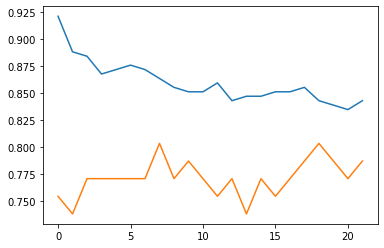

In [726]:
plt.plot(train_acc)
plt.plot(test_acc)

In [727]:
acc_diff = np.array(train_acc)-np.array(test_acc)
index = np.where(acc_diff == min(acc_diff))[0]
best_k_value = k_values[index[0]]
print("Best_K_value as p=1 :",best_k_value)

Best_K_value as p=1 : 21


#### Training_Accuracy & Testing_Accuracy as k=21 & p=1

In [728]:
normal_train_acc_H1 = train_acc[index[0]]
print(f"Training Acc for k={best_k_value} & p=1 :",normal_train_acc_H1)

normal_test_acc_H1 = test_acc[index[0]]
print(f"Testing Acc for k={best_k_value} & p=1 :",normal_test_acc_H1)

Training Acc for k=21 & p=1 : 0.8429752066115702
Testing Acc for k=21 & p=1 : 0.8032786885245902


### Finding Best k or n_neighbors value as p = 2

In [729]:
train_acc = []
test_acc  = []
k_values = []
for k in range(3,25):
    knn_model6 = KNeighborsClassifier(n_neighbors=k,p=2)
    knn_model6.fit(x_train1,y_train1)
    k_values.append(k)
    
    training_acc = knn_model6.score(x_train1,y_train1)
    train_acc.append(training_acc)
    
    testing_acc  = knn_model6.score(x_test1,y_test1)
    test_acc.append(testing_acc)
    
print("train_acc :",train_acc)
print("test_acc :",test_acc)
print("k_values :",k_values)

train_acc : [0.9049586776859504, 0.8760330578512396, 0.859504132231405, 0.8677685950413223, 0.8553719008264463, 0.8553719008264463, 0.8553719008264463, 0.8471074380165289, 0.8388429752066116, 0.8264462809917356, 0.8181818181818182, 0.8099173553719008, 0.8388429752066116, 0.8181818181818182, 0.8057851239669421, 0.8140495867768595, 0.8099173553719008, 0.8181818181818182, 0.8181818181818182, 0.8264462809917356, 0.8099173553719008, 0.8264462809917356]
test_acc : [0.7377049180327869, 0.7704918032786885, 0.7377049180327869, 0.7704918032786885, 0.7704918032786885, 0.7868852459016393, 0.7704918032786885, 0.7704918032786885, 0.7704918032786885, 0.7868852459016393, 0.7540983606557377, 0.7704918032786885, 0.7868852459016393, 0.7868852459016393, 0.7704918032786885, 0.7868852459016393, 0.7704918032786885, 0.7704918032786885, 0.7540983606557377, 0.7540983606557377, 0.7377049180327869, 0.7377049180327869]
k_values : [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [730]:
plt.plot(train_acc)
plt.plot(test_acc)

In [731]:
acc_diff = np.array(train_acc)-np.array(test_acc)
index = np.where(acc_diff == min(acc_diff))[0]
best_k_value = k_values[index[0]]
print("Best_K_value as p=1 :",best_k_value)

Best_K_value as p=1 : 18


#### Training_Accuracy & Testing_Accuracy as k=18 & p=2

In [732]:
normal_train_acc_H2 = train_acc[index[0]]
print(f"Training Acc for k={best_k_value} & p=2 :",normal_train_acc_H2)

normal_test_acc_H2 = test_acc[index[0]]
print(f"Testing Acc for k={best_k_value} & p=2 :",normal_test_acc_H2)

Training Acc for k=18 & p=2 : 0.8140495867768595
Testing Acc for k=18 & p=2 : 0.7868852459016393


## 2.Standardization

In [733]:
std_scalar = StandardScaler()
std_scalar.fit(x)
array1 = std_scalar.transform(x)
x_std = pd.DataFrame(array1,columns=x.columns)
x_std

age       sex        cp  trestbps      chol       fbs   restecg  \
0    0.952197  0.681005  1.973123  0.828728 -0.255601  2.394438 -1.005832   
1   -1.915313  0.681005  1.002577 -0.077351  0.102487 -0.417635  0.898962   
2   -1.474158 -1.468418  0.032031 -0.077351 -0.866457 -0.417635 -1.005832   
3    0.180175  0.681005  0.032031 -0.681403 -0.192409 -0.417635  0.898962   
4    0.290464 -1.468418 -0.938515 -0.681403  2.293143 -0.417635  0.898962   
..        ...       ...       ...       ...       ...       ...       ...   
298  0.290464 -1.468418 -0.938515  0.526702 -0.087089 -0.417635  0.898962   
299 -1.033002  0.681005  1.973123 -1.285455  0.397383 -0.417635  0.898962   
300  1.503641  0.681005 -0.938515  0.768323 -1.098161  2.394438  0.898962   
301  0.290464  0.681005 -0.938515 -0.077351 -2.404128 -0.417635  0.898962   
302  0.290464 -1.468418  0.032031 -0.077351 -0.192409 -0.417635 -1.005832   

      thalach     exang   oldpeak     slope        ca      thal  
0    0.013543 -0.696631  1.150938 -2.274579 -0.714429 -2.148873  
1    1.641748 -0.696631  2.233684 -2.274579 -0.714429 -0.512922  
2    0.981665 -0.696631  0.338879  0.976352 -0.714429 -0.512922  
3    1.245698 -0.696631 -0.202494  0.976352 -0.714429 -0.512922  
4    0.585615  1.435481 -0.382951  0.976352 -0.714429 -0.512922  
..        ...       ...       ...       ...       ...       ...  
298 -1.174607  1.435481 -0.743867 -0.649113 -0.714429  1.123029  
299 -0.778557 -0.696631  0.158422 -0.649113 -0.714429  1.123029  
300 -0.382507 -0.696631  2.143455 -0.649113  1.244593  1.123029  
301 -1.526651  1.435481  0.158422 -0.649113  0.265082  1.123029  
302  1.069676 -0.696631 -0.924324 -0.649113  0.265082 -0.512922  

[303 rows x 13 columns]

In [734]:
import pickle

In [735]:
with open("std_data.pkl","wb") as f:
    pickle.dump(std_scalar,f)

### Train-Test Split

In [736]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(x_std,y,test_size=0.2,random_state=47,stratify=y)

In [845]:
x_train2.loc[43]

age        -0.150692
sex        -1.468418
cp         -0.938515
trestbps   -0.077351
chol        0.397383
fbs        -0.417635
restecg    -1.005832
thalach    -0.294496
exang      -0.696631
oldpeak    -0.563409
slope      -0.649113
ca         -0.714429
thal       -0.512922
Name: 43, dtype: float64

In [836]:
x_train2.head()

age       sex        cp  trestbps      chol       fbs   restecg  \
293  1.393352  0.681005  1.002577  1.251565 -0.697945 -0.417635 -1.005832   
266  0.069886 -1.468418 -0.938515  2.338859  1.724415 -0.417635  2.803756   
43  -0.150692 -1.468418 -0.938515 -0.077351  0.397383 -0.417635 -1.005832   
169 -0.150692  0.681005 -0.938515  0.526702 -0.887521  2.394438 -1.005832   
166  1.393352  0.681005 -0.938515 -0.681403 -0.339857 -0.417635 -1.005832   

      thalach     exang   oldpeak     slope        ca      thal  
293  0.013543 -0.696631 -0.202494 -0.649113 -0.714429  1.123029  
266 -1.438640  1.435481  2.143455 -0.649113 -0.714429 -0.512922  
43  -0.294496 -0.696631 -0.563409 -0.649113 -0.714429 -0.512922  
169  0.233571  1.435481  1.872769 -2.274579 -0.714429  1.123029  
166 -0.910573  1.435481  1.421625 -0.649113  1.244593  1.123029

In [837]:
y_train2.head()

293    0
266    0
43     1
169    0
166    0
Name: target, dtype: int64

In [737]:
knn_model7 = KNeighborsClassifier()
knn_model7.fit(x_train2,y_train2)

KNeighborsClassifier()

### Training & Testing Accuracy

In [738]:
std_train_acc = knn_model7.score(x_train2,y_train2)
print("train_acc4 : ",std_train_acc)

train_acc4 :  0.8884297520661157


In [739]:
std_test_acc = knn_model7.score(x_test2,y_test2)
print("train_acc4 : ",std_test_acc)

train_acc4 :  0.8032786885245902


In [740]:
y_pred_train2 = knn_model7.predict(x_train2)

In [741]:
acc_score = accuracy_score(y_train2,y_pred_train2)
print("Accuracy_Score :\n",acc_score)

cnf_metrix = confusion_matrix(y_train2,y_pred_train2)
print("Confusion_Metrix : \n",cnf_metrix)

clf_report = classification_report(y_train2,y_pred_train2)
print("Classification_Report : \n",clf_report)

Accuracy_Score :
 0.8884297520661157
Confusion_Metrix : 
 [[ 93  17]
 [ 10 122]]
Classification_Report : 
               precision    recall  f1-score   support

           0       0.90      0.85      0.87       110
           1       0.88      0.92      0.90       132

    accuracy                           0.89       242
   macro avg       0.89      0.88      0.89       242
weighted avg       0.89      0.89      0.89       242



In [742]:
y_pred_test2 = knn_model7.predict(x_test2)

In [743]:
acc_score = accuracy_score(y_test2,y_pred_test2)
print("Accuracy_Score :\n",acc_score)

cnf_metrix = confusion_matrix(y_test2,y_pred_test2)
print("Confusion_Metrix : \n",cnf_metrix)

clf_report = classification_report(y_test2,y_pred_test2)
print("Classification_Report : \n",clf_report)

Accuracy_Score :
 0.8032786885245902
Confusion_Metrix : 
 [[21  7]
 [ 5 28]]
Classification_Report : 
               precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



### Hyperparameter Tuning

### Finding Best k or n_neighbors value as p = 1

In [744]:
train_acc = []
test_acc  = []
k_values = []
for k in range(3,25):
    knn_model8 = KNeighborsClassifier(n_neighbors=k,p=1)
    knn_model8.fit(x_train2,y_train2)
    k_values.append(k)
    
    training_acc = knn_model8.score(x_train2,y_train2)
    train_acc.append(training_acc)
    
    testing_acc  = knn_model8.score(x_test2,y_test2)
    test_acc.append(testing_acc)
    
print("train_acc :",train_acc)
print("test_acc :",test_acc)
print("k_values :",k_values)

train_acc : [0.9380165289256198, 0.9256198347107438, 0.8925619834710744, 0.8801652892561983, 0.8677685950413223, 0.8636363636363636, 0.8677685950413223, 0.8512396694214877, 0.859504132231405, 0.859504132231405, 0.8636363636363636, 0.8636363636363636, 0.8677685950413223, 0.8512396694214877, 0.8471074380165289, 0.8471074380165289, 0.8429752066115702, 0.8471074380165289, 0.8512396694214877, 0.8471074380165289, 0.8471074380165289, 0.8553719008264463]
test_acc : [0.7049180327868853, 0.7213114754098361, 0.7213114754098361, 0.7377049180327869, 0.7377049180327869, 0.7704918032786885, 0.8032786885245902, 0.7704918032786885, 0.8524590163934426, 0.7868852459016393, 0.7704918032786885, 0.7868852459016393, 0.7704918032786885, 0.7868852459016393, 0.7868852459016393, 0.7868852459016393, 0.7868852459016393, 0.8032786885245902, 0.7868852459016393, 0.8032786885245902, 0.8360655737704918, 0.819672131147541]
k_values : [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


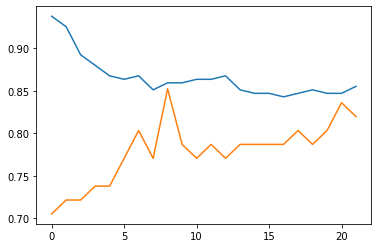

In [745]:
plt.plot(train_acc)
plt.plot(test_acc)

In [746]:
acc_diff = np.array(train_acc)-np.array(test_acc)
index = np.where(acc_diff == min(acc_diff))[0]
best_k_value = k_values[index[0]]
print("Best_K_value as p=1 :",best_k_value)

Best_K_value as p=1 : 11


### Training_Accuracy & Testing_Accuracy as k=11 & p=1

In [747]:
std_train_acc_H1 = train_acc[index[0]]
print(f"Training Acc for k={best_k_value} & p=1 :",std_train_acc_H1)

std_test_acc_H1 = test_acc[index[0]]
print(f"Testing Acc for k={best_k_value} & p=1 :",std_test_acc_H1)

Training Acc for k=11 & p=1 : 0.859504132231405
Testing Acc for k=11 & p=1 : 0.8524590163934426


In [748]:
knn_model9 = KNeighborsClassifier(n_neighbors=11,p=1)
knn_model9.fit(x_train2,y_train2)

training_acc = knn_model9.score(x_train2,y_train2)
    
testing_acc  = knn_model9.score(x_test2,y_test2)
    
print("train_acc :",training_acc)
print("test_acc :",testing_acc)

train_acc : 0.859504132231405
test_acc : 0.8524590163934426


In [749]:
with open("knn_model.pkl","wb") as f:
    pickle.dump(knn_model9,f)

### Finding Best k or n_neighbors value as p = 2

In [750]:
train_acc = []
test_acc  = []
k_values = []
for k in range(3,25):
    knn_model10 = KNeighborsClassifier(n_neighbors=k,p=2)
    knn_model10.fit(x_train2,y_train2)
    k_values.append(k)
    
    training_acc = knn_model10.score(x_train2,y_train2)
    train_acc.append(training_acc)
    
    testing_acc  = knn_model10.score(x_test2,y_test2)
    test_acc.append(testing_acc)
    
print("train_acc :",train_acc)
print("test_acc :",test_acc)
print("k_values :",k_values)

train_acc : [0.9049586776859504, 0.9008264462809917, 0.8884297520661157, 0.8884297520661157, 0.8760330578512396, 0.8801652892561983, 0.859504132231405, 0.8677685950413223, 0.859504132231405, 0.8553719008264463, 0.859504132231405, 0.859504132231405, 0.8636363636363636, 0.8553719008264463, 0.8471074380165289, 0.8512396694214877, 0.8388429752066116, 0.8388429752066116, 0.8388429752066116, 0.8429752066115702, 0.8388429752066116, 0.8429752066115702]
test_acc : [0.8032786885245902, 0.7868852459016393, 0.8032786885245902, 0.7868852459016393, 0.7704918032786885, 0.7704918032786885, 0.7704918032786885, 0.7704918032786885, 0.8032786885245902, 0.819672131147541, 0.8360655737704918, 0.7868852459016393, 0.8032786885245902, 0.8032786885245902, 0.8032786885245902, 0.8032786885245902, 0.8032786885245902, 0.8032786885245902, 0.8032786885245902, 0.8032786885245902, 0.8032786885245902, 0.7868852459016393]
k_values : [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


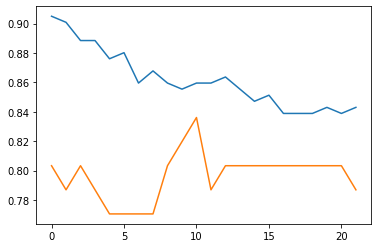

In [751]:
plt.plot(train_acc)
plt.plot(test_acc)

In [752]:
acc_diff = np.array(train_acc)-np.array(test_acc)
index = np.where(acc_diff == min(acc_diff))[0]
best_k_value = k_values[index[0]]
print("Best_K_value as p=1 :",best_k_value)

Best_K_value as p=1 : 13


### Training_Accuracy & Testing_Accuracy as k=13 & p=2

In [753]:
std_train_acc_H2 = train_acc[index[0]]
print(f"Training Acc for k={best_k_value} & p=1 :",std_train_acc_H2)

std_test_acc_H2 = test_acc[index[0]]
print(f"Testing Acc for k={best_k_value} & p=1 :",std_test_acc_H2)

Training Acc for k=13 & p=1 : 0.859504132231405
Testing Acc for k=13 & p=1 : 0.8360655737704918


# 3. Decision Tree Model

In [754]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(x,y,test_size=0.2,random_state=45,stratify=y)

### Instantiating Decision Tree Model

In [755]:
dt_model = DecisionTreeClassifier(random_state=47)
dt_model.fit(x_train3,y_train3)

DecisionTreeClassifier(random_state=47)

### Training Data Evaluation

In [756]:
y_pred_train = dt_model.predict(x_train3)

In [757]:
dt_train_acc = dt_model.score(x_train3,y_train3)
dt_train_acc

1.0

In [758]:
train_acc = accuracy_score(y_train3,y_pred_train)
print("Accuracy : \n",train_acc)

cnf_mat = confusion_matrix(y_train3,y_pred_train)
print("Confusion Matrix : \n",cnf_mat)

clf_rep = classification_report(y_train3,y_pred_train)
print("Classification Report : \n",clf_rep)

Accuracy : 
 1.0
Confusion Matrix : 
 [[110   0]
 [  0 132]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       132

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



### Testing Data Evaluation

In [759]:
y_pred_test = dt_model.predict(x_test3)

In [760]:
dt_test_acc = dt_model.score(x_test3,y_test3)
dt_test_acc

0.7213114754098361

In [761]:
test_acc = accuracy_score(y_test3,y_pred_test)
print("Accuracy : \n",test_acc)

cnf_mat = confusion_matrix(y_test3,y_pred_test)
print("Confusion Matrix : \n",cnf_mat)

clf_rep = classification_report(y_test3,y_pred_test)
print("Classification Report : \n",clf_rep)

Accuracy : 
 0.7213114754098361
Confusion Matrix : 
 [[18 10]
 [ 7 26]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.72      0.64      0.68        28
           1       0.72      0.79      0.75        33

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



In [762]:
plt.figure(figsize=(200,150))
tree = plot_tree(dt_model,feature_names=x.columns,class_names=["0","1"],filled = True)
plt.savefig("dt_model.png")

In [763]:
dt_model.feature_importances_

array([0.        , 0.0120098 , 0.31071089, 0.09145974, 0.10566747,
       0.00496737, 0.        , 0.11332916, 0.02820043, 0.04167817,
       0.04045455, 0.11180994, 0.13971248])

<AxesSubplot:>

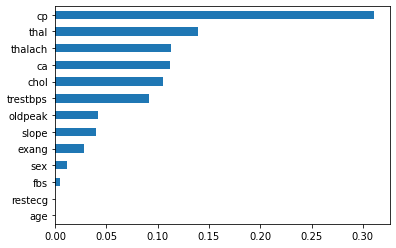

In [764]:
s1 = pd.Series(dt_model.feature_importances_,index=x.columns)
s1.sort_values().plot(kind = "barh")

### Hyperparameter Tuning

In [765]:
dt_model1 = DecisionTreeClassifier(random_state=47)

hyperparameters = {"criterion":["gini","entropy"],
                  "max_depth":np.arange(3,10),
                  "min_samples_split":np.arange(5,20),
                  "min_samples_leaf":np.arange(3,10)}

gscv_dt_model = GridSearchCV(dt_model1,hyperparameters,cv = 5)
gscv_dt_model.fit(x_train3,y_train3)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=47),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])})

In [766]:
gscv_dt_model.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=9, min_samples_split=5,
                       random_state=47)

In [767]:
dt_model2 = gscv_dt_model.best_estimator_
dt_model2.fit(x_train3,y_train3)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=9, min_samples_split=5,
                       random_state=47)

### Training Data Evaluation after hyperparameter tuning

In [768]:
y_pred_train = dt_model2.predict(x_train3)

In [769]:
dt_train_acc_H1 = dt_model2.score(x_train3,y_train3)
dt_train_acc_H1

0.8636363636363636

In [770]:
train_acc = accuracy_score(y_train3,y_pred_train)
print("Accuracy : \n",train_acc)

cnf_mat = confusion_matrix(y_train3,y_pred_train)
print("Confusion Matrix : \n",cnf_mat)

clf_rep = classification_report(y_train3,y_pred_train)
print("Classification Report : \n",clf_rep)

Accuracy : 
 0.8636363636363636
Confusion Matrix : 
 [[ 91  19]
 [ 14 118]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       110
           1       0.86      0.89      0.88       132

    accuracy                           0.86       242
   macro avg       0.86      0.86      0.86       242
weighted avg       0.86      0.86      0.86       242



### Testing Data Evaluation after hyperparameter tuning

In [771]:
y_pred_test = dt_model2.predict(x_test3)

In [772]:
dt_test_acc_H1 = dt_model2.score(x_test3,y_test3)
dt_test_acc_H1

0.7704918032786885

In [773]:
test_acc = accuracy_score(y_test3,y_pred_test)
print("Accuracy : \n",test_acc)

cnf_mat = confusion_matrix(y_test3,y_pred_test)
print("Confusion Matrix : \n",cnf_mat)

clf_rep = classification_report(y_test3,y_pred_test)
print("Classification Report : \n",clf_rep)

Accuracy : 
 0.7704918032786885
Confusion Matrix : 
 [[19  9]
 [ 5 28]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.68      0.73        28
           1       0.76      0.85      0.80        33

    accuracy                           0.77        61
   macro avg       0.77      0.76      0.77        61
weighted avg       0.77      0.77      0.77        61



In [774]:
plt.figure(figsize=(200,150))
tree = plot_tree(dt_model2,feature_names = x.columns,class_names=["0","1"],filled=True)
plt.savefig("dt_model_H1.png")

### Pruning

In [775]:
dt_model_pruning = DecisionTreeClassifier(random_state=47)
dt_model_pruning.fit(x_train3,y_train3)

DecisionTreeClassifier(random_state=47)

In [776]:
result = dt_model_pruning.cost_complexity_pruning_path(x_train3,y_train3)
ccp_alphas = result["ccp_alphas"]
ccp_alphas

array([0.        , 0.00385675, 0.00404431, 0.00407056, 0.0050632 ,
       0.00522877, 0.00550964, 0.00661157, 0.00688705, 0.00688705,
       0.0072314 , 0.00768603, 0.00782949, 0.00991736, 0.00991736,
       0.01056015, 0.01114265, 0.01115702, 0.01126972, 0.01398368,
       0.01496458, 0.02568847, 0.0377135 , 0.04855589, 0.1419503 ])

In [777]:
train_acc_list = []
test_acc_list = []
for ccp_alpha in ccp_alphas:
    dt_clf_pruning = DecisionTreeClassifier(random_state=20, ccp_alpha=ccp_alpha)
    dt_clf_pruning.fit(x_train, y_train)
    
    train_acc = dt_clf_pruning.score(x_train, y_train)
    train_acc_list.append(train_acc)
    
    test_acc = dt_clf_pruning.score(x_test, y_test)
    test_acc_list.append(test_acc)
    print(ccp_alpha, test_acc,train_acc )

0.0 0.6885245901639344 1.0
0.003856749311294767 0.6721311475409836 0.9958677685950413
0.0040443115878319 0.6721311475409836 0.9917355371900827
0.004070556309362275 0.6721311475409836 0.9917355371900827
0.005063204579645583 0.6721311475409836 0.987603305785124
0.005228766546146593 0.6721311475409836 0.987603305785124
0.005509641873278236 0.6721311475409836 0.9669421487603306
0.006611570247933882 0.6721311475409836 0.9669421487603306
0.006887052341597796 0.6557377049180327 0.9586776859504132
0.006887052341597796 0.6557377049180327 0.9586776859504132
0.007231404958677686 0.6557377049180327 0.9545454545454546
0.007686034594153204 0.6557377049180327 0.9297520661157025
0.007829491083079603 0.6557377049180327 0.9214876033057852
0.009917355371900825 0.6557377049180327 0.9173553719008265
0.009917355371900829 0.6557377049180327 0.9173553719008265
0.010560146923783287 0.639344262295082 0.9132231404958677
0.011142649541821537 0.639344262295082 0.9132231404958677
0.01115702479338843 0.6393442622950

In [778]:
plt.plot(ccp_alphas,train_acc_list)
plt.plot(ccp_alphas,test_acc_list)

# 4.Random Forest Model

### Train Test Split

In [779]:
x_train4,x_test4,y_train4,y_test4 = train_test_split(x,y,test_size=0.2,random_state=47,stratify=y)

### Instantiating random forest model

In [780]:
rf_model1 = RandomForestClassifier(random_state=45)
rf_model1.fit(x_train4,y_train4)

RandomForestClassifier(random_state=45)

### Training Data Evaluation

In [781]:
y_pred_train = rf_model1.predict(x_train4)

In [782]:
rf_train_acc = rf_model1.score(x_train4,y_train4)
rf_train_acc

1.0

In [783]:
acc = accuracy_score(y_train4,y_pred_train)
print("Accuracy Score : \n",acc)

cnf_mat = confusion_matrix(y_train4,y_pred_train)
print("Confusion Metrix : \n",cnf_mat)

clf_rep = classification_report(y_train4,y_pred_train)
print("Classification Report : \n",clf_rep)

Accuracy Score : 
 1.0
Confusion Metrix : 
 [[110   0]
 [  0 132]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       132

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



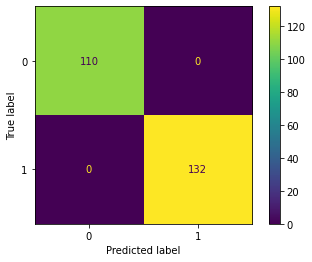

In [784]:
plot_confusion_matrix(rf_model1,x_train4,y_train4)

### Testing Data Evaluation

In [785]:
y_pred_test = rf_model1.predict(x_test4)

In [786]:
rf_test_acc = rf_model1.score(x_test4,y_test4)
rf_test_acc

0.7213114754098361

In [787]:
acc = accuracy_score(y_test4,y_pred_test)
print("Accuracy Score : \n",acc)

cnf_mat = confusion_matrix(y_test4,y_pred_test)
print("Confusion Metrix : \n",cnf_mat)

clf_rep = classification_report(y_test4,y_pred_test)
print("Classification Report : \n",clf_rep)

Accuracy Score : 
 0.7213114754098361
Confusion Metrix : 
 [[19  9]
 [ 8 25]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.70      0.68      0.69        28
           1       0.74      0.76      0.75        33

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



In [788]:
plot_confusion_matrix(rf_model1,x_test4,y_test4)

### Hyperparameter Tuning

In [789]:
rf_model2 = RandomForestClassifier()
hyperparameters = {"n_estimators":[70,100],
                    "criterion":['gini',"entropy","log_loss"],
                    "max_depth":np.arange(3,9),
                    "min_samples_split":np.arange(3,20),
                    "min_samples_leaf":np.arange(3,9),
                    "max_features":['sqrt',"log2"]}
rscv_model = RandomizedSearchCV(rf_model2,hyperparameters,cv = 5,n_jobs=-1)
rscv_model.fit(x_train4,y_train4)
rscv_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=3,
                       min_samples_split=9, n_estimators=70)

In [790]:
rf_model3 = rscv_model.best_estimator_
rf_model3.fit(x_train4,y_train4)

RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=3,
                       min_samples_split=9, n_estimators=70)

### Training Data Evaluation

In [791]:
y_pred_train = rf_model3.predict(x_train4)

In [792]:
rf_train_acc_H1 = rf_model3.score(x_train4,y_train4)
rf_train_acc_H1

0.9297520661157025

In [793]:
acc = accuracy_score(y_train4,y_pred_train)
print("Accuracy Score : \n",acc)

cnf_mat = confusion_matrix(y_train4,y_pred_train)
print("Confusion Metrix : \n",cnf_mat)

clf_rep = classification_report(y_train4,y_pred_train)
print("Classification Report : \n",clf_rep)

Accuracy Score : 
 0.9297520661157025
Confusion Metrix : 
 [[100  10]
 [  7 125]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       110
           1       0.93      0.95      0.94       132

    accuracy                           0.93       242
   macro avg       0.93      0.93      0.93       242
weighted avg       0.93      0.93      0.93       242



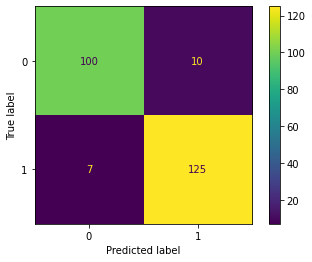

In [794]:
plot_confusion_matrix(rf_model3,x_train4,y_train4)

### Testing Data Evaluation

In [795]:
y_pred_test = rf_model3.predict(x_test4)

In [796]:
rf_test_acc_H1 = rf_model3.score(x_test4,y_test4)
rf_test_acc_H1

0.8032786885245902

In [797]:
acc = accuracy_score(y_test4,y_pred_test)
print("Accuracy Score : \n",acc)

cnf_mat = confusion_matrix(y_test4,y_pred_test)
print("Confusion Metrix : \n",cnf_mat)

clf_rep = classification_report(y_test4,y_pred_test)
print("Classification Report : \n",clf_rep)

Accuracy Score : 
 0.8032786885245902
Confusion Metrix : 
 [[20  8]
 [ 4 29]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.71      0.77        28
           1       0.78      0.88      0.83        33

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



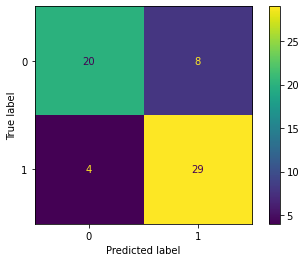

In [798]:
plot_confusion_matrix(rf_model3,x_test4,y_test4)

# 5.Adaboost

In [799]:
x_train5,x_test5,y_train5,y_test5 = train_test_split(x,y,test_size=0.2,random_state=47,stratify=y)

## Instantiating adaboost model

In [800]:
adaboost_model1 = AdaBoostClassifier(random_state=45)
adaboost_model1.fit(x_train5,y_train5)

AdaBoostClassifier(random_state=45)

### Training Data Evaluation

In [801]:
adaboost_train_acc = adaboost_model1.score(x_train5,y_train5)
adaboost_train_acc

0.9504132231404959

In [802]:
y_pred_train = adaboost_model1.predict(x_train5)

In [803]:
acc_score = accuracy_score(y_train5,y_pred_train)
print("Accuracy_score :\n",acc_score)

cnf_metrics = confusion_matrix(y_train5,y_pred_train)
print("Confusion Metrix : \n",cnf_metrics)

clf_report = classification_report(y_train5,y_pred_train)
print("Classification Report :\n",clf_report)

Accuracy_score :
 0.9504132231404959
Confusion Metrix : 
 [[104   6]
 [  6 126]]
Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       110
           1       0.95      0.95      0.95       132

    accuracy                           0.95       242
   macro avg       0.95      0.95      0.95       242
weighted avg       0.95      0.95      0.95       242



### Testing Data Evaluation

In [804]:
adaboost_test_acc = adaboost_model1.score(x_test5,y_test5)
adaboost_test_acc

0.7868852459016393

In [805]:
y_pred_test = adaboost_model1.predict(x_test5)

In [806]:
acc_score = accuracy_score(y_test5,y_pred_test)
print("Accuracy_score :\n",acc_score)

cnf_metrics = confusion_matrix(y_test5,y_pred_test)
print("Confusion Metrix : \n",cnf_metrics)

clf_report = classification_report(y_test5,y_pred_test)
print("Classification Report :\n",clf_report)

Accuracy_score :
 0.7868852459016393
Confusion Metrix : 
 [[21  7]
 [ 6 27]]
Classification Report :
               precision    recall  f1-score   support

           0       0.78      0.75      0.76        28
           1       0.79      0.82      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



### Hyperparameter Tuning 1

In [807]:
estimator = DecisionTreeClassifier(random_state=45)

adaboost_model2 = AdaBoostClassifier(random_state=45)

In [808]:
hyperparameters = {"n_estimators":np.arange(20,100),"learning_rate":np.arange(0.1,2,0.1)}

rscv_model = RandomizedSearchCV(adaboost_model2,hyperparameters,cv=5 ,random_state=47)
rscv_model.fit(x_train5,y_train5)
rscv_model.best_estimator_

AdaBoostClassifier(learning_rate=0.5, n_estimators=27, random_state=45)

In [809]:
adaboost_model3 = rscv_model.best_estimator_
adaboost_model3.fit(x_train5,y_train5)

AdaBoostClassifier(learning_rate=0.5, n_estimators=27, random_state=45)

### Training Data Evaluation for Hypermarameter Tuning 1

In [810]:
adaboost_train_acc_H1 = adaboost_model3.score(x_train5,y_train5)
adaboost_train_acc_H1

0.8925619834710744

In [811]:
y_pred_train = adaboost_model3.predict(x_train5)

In [812]:
acc_score = accuracy_score(y_train5,y_pred_train)
print("Accuracy_score :\n",acc_score)

cnf_metrics = confusion_matrix(y_train5,y_pred_train)
print("Confusion Metrix : \n",cnf_metrics)

clf_report = classification_report(y_train5,y_pred_train)
print("Classification Report :\n",clf_report)

Accuracy_score :
 0.8925619834710744
Confusion Metrix : 
 [[ 95  15]
 [ 11 121]]
Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       110
           1       0.89      0.92      0.90       132

    accuracy                           0.89       242
   macro avg       0.89      0.89      0.89       242
weighted avg       0.89      0.89      0.89       242



### Testing Data Evaluation for Hyperparameter 1

In [813]:
adaboost_test_acc_H1 = adaboost_model3.score(x_test5,y_test5)
adaboost_test_acc_H1

0.8032786885245902

In [814]:
y_pred_test = adaboost_model3.predict(x_test5)

In [815]:
acc_score = accuracy_score(y_test5,y_pred_test)
print("Accuracy_score :\n",acc_score)

cnf_metrics = confusion_matrix(y_test5,y_pred_test)
print("Confusion Metrix : \n",cnf_metrics)

clf_report = classification_report(y_test5,y_pred_test)
print("Classification Report :\n",clf_report)

Accuracy_score :
 0.8032786885245902
Confusion Metrix : 
 [[20  8]
 [ 4 29]]
Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.71      0.77        28
           1       0.78      0.88      0.83        33

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



### Hyperparameter Tuning 2

In [816]:
estimator = DecisionTreeClassifier(random_state=47)
hyperparameters = {"n_estimators":np.arange(20,100),"learning_rate":np.arange(0.1,2,0.1)}

adaboost_model4 = AdaBoostClassifier(estimator,random_state=44)
rscv_H2=RandomizedSearchCV(adaboost_model4,hyperparameters,cv=5,random_state=45)
rscv_H2.fit(x_train5,y_train5)
rscv_H2.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=47),
                   learning_rate=1.3000000000000003, n_estimators=31,
                   random_state=44)

In [817]:
adaboost_model5 = rscv_H2.best_estimator_

### Training Data Evaluation for Base estimator Hyperparameter 2 

In [818]:
adaboost_train_acc_H2 = adaboost_model5.score(x_train5,y_train5)
adaboost_train_acc_H2

1.0

In [819]:
y_pred_train = adaboost_model5.predict(x_train5)

In [820]:
acc_score = accuracy_score(y_train5,y_pred_train)
print("Accuracy_score :\n",acc_score)

cnf_metrics = confusion_matrix(y_train5,y_pred_train)
print("Confusion Metrix : \n",cnf_metrics)

clf_report = classification_report(y_train5,y_pred_train)
print("Classification Report :\n",clf_report)

Accuracy_score :
 1.0
Confusion Metrix : 
 [[110   0]
 [  0 132]]
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       132

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



### Testing Data Evaluation for Base estimator Hyperparameter 2

In [821]:
adaboost_test_acc_H2 = adaboost_model5.score(x_test5,y_test5)
adaboost_test_acc_H2

0.6885245901639344

In [822]:
y_pred_test = adaboost_model5.predict(x_test5)

In [823]:
acc_score = accuracy_score(y_test5,y_pred_test)
print("Accuracy_score :\n",acc_score)

cnf_metrics = confusion_matrix(y_test5,y_pred_test)
print("Confusion Metrix : \n",cnf_metrics)

clf_report = classification_report(y_test5,y_pred_test)
print("Classification Report :\n",clf_report)

Accuracy_score :
 0.6885245901639344
Confusion Metrix : 
 [[18 10]
 [ 9 24]]
Classification Report :
               precision    recall  f1-score   support

           0       0.67      0.64      0.65        28
           1       0.71      0.73      0.72        33

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



# All Model Accuracies

In [824]:
accuracy = {"logistic_train_acc":logistic_train_acc,"logistic_test_acc":logistic_test_acc,
            "ridge_train_acc":ridge_train_acc,"ridge_test_acc":ridge_test_acc,
            "knn_train_acc":knn_train_acc,"knn_test_acc":knn_test_acc,
                "knn_train_acc_H1":knn_train_acc_H1,"knn_test_acc_H1":knn_test_acc_H1,
                "knn_train_acc_H2":knn_train_acc_H2,"knn_test_acc_H2":knn_test_acc_H2,
                "normal_train_acc":normal_train_acc,"normal_test_acc":normal_test_acc,
                "normal_train_acc_H1":normal_train_acc_H1,"normal_test_acc_H1":normal_test_acc_H1,
               "normal_train_acc_H2":normal_train_acc_H2,"normal_test_acc_H2":normal_test_acc_H2,
               "std_train_acc":std_train_acc,"std_test_acc":std_test_acc,
                "std_train_acc_H1":std_train_acc_H1,"std_test_acc_H1":std_test_acc_H1,
               "std_train_acc_H2":std_train_acc_H2,"std_test_acc_H2":std_test_acc_H2,
           "dt_train_acc":dt_train_acc,"dt_test_acc":dt_test_acc,
           "dt_train_acc_H1":dt_train_acc_H1,"dt_test_acc_H1":dt_test_acc_H1,
           "rf_train_acc":rf_train_acc,"rf_test_acc":rf_test_acc,
           "rf_train_acc_H1":rf_train_acc_H1,"rf_test_acc_H1":rf_test_acc_H1,
           "adaboost_train_acc":adaboost_train_acc,"adaboost_test_acc":adaboost_test_acc,
           "adaboost_train_acc_H1":adaboost_train_acc_H1,"adaboost_test_acc_H1":adaboost_test_acc_H1,
           "adaboost_train_acc_H2":adaboost_train_acc_H2,"adaboost_test_acc_H2":adaboost_test_acc_H2}
acc_df = pd.DataFrame([accuracy])
acc_df.T

0
logistic_train_acc     0.847107
logistic_test_acc      0.836066
ridge_train_acc        0.847107
ridge_test_acc         0.803279
knn_train_acc          0.760331
knn_test_acc           0.606557
knn_train_acc_H1       0.735537
knn_test_acc_H1        0.672131
knn_train_acc_H2       0.702479
knn_test_acc_H2        0.704918
normal_train_acc       0.859504
normal_test_acc        0.737705
normal_train_acc_H1    0.842975
normal_test_acc_H1     0.803279
normal_train_acc_H2    0.814050
normal_test_acc_H2     0.786885
std_train_acc          0.888430
std_test_acc           0.803279
std_train_acc_H1       0.859504
std_test_acc_H1        0.852459
std_train_acc_H2       0.859504
std_test_acc_H2        0.836066
dt_train_acc           1.000000
dt_test_acc            0.721311
dt_train_acc_H1        0.863636
dt_test_acc_H1         0.770492
rf_train_acc           1.000000
rf_test_acc            0.721311
rf_train_acc_H1        0.929752
rf_test_acc_H1         0.803279
adaboost_train_acc     0.950413
adaboost_test_acc      0.786885
adaboost_train_acc_H1  0.892562
adaboost_test_acc_H1   0.803279
adaboost_train_acc_H2  1.000000
adaboost_test_acc_H2   0.688525

# CONCLUSION:

## Pickle file for stardizing test data

In [825]:
# with open("std_data.pkl","wb") as f:
#     pickle.dump(std_scalar,f)

## Pickle file for predictive model

In [826]:
# with open("knn_model.pkl","wb") as f:
#     pickle.dump(knn_model9,f)

## Test Prediction